<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>EDA Project - E Commerce</b></p>

<b>Contains:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Dataset</a></li>
<li><a href="#understanding-dataset">Understanding The Dataset</a></li>
<li><a href="#organizing-columns">Organizing Columns</a></li>
<li><a href="#nan-values">NaN Values</a></li>
<li><a href="#data-visualization">Data Visualization</a></li>
</ul>

<a id='import-library'></a>
# <font color='firebrick'> <b>Importing Libraries</b><font color='black'> 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='firebrick'> <b>Loading The Dataset</b><font color='black'> 

In [6]:
df0 = pd.read_csv("realistic_e_commerce_sales_data.csv")
df = df0.copy()

In [7]:
df.head()

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,CUST0268,Male,North,NaN,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08
1,CUST0046,Male,West,22.0,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09
2,CUST0169,Female,South,54.0,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28
3,CUST0002,Male,North,23.0,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18
4,CUST0173,Female,South,NaN,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19


In [8]:
df.sample(5)

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
716,CUST0263,Female,West,40.0,Monitor,Electronics,300.0,1,300,11.65,Delivered,2023-07-22
650,CUST0152,Male,North,69.0,Monitor,Electronics,300.0,5,1500,17.75,In Transit,2023-11-14
733,CUST0232,Female,NaN,44.0,Laptop,Electronics,1500.0,5,7500,18.30,Returned,2023-11-07
365,CUST0019,Male,West,69.0,Smartwatch,Wearables,200.0,1,200,12.86,In Transit,2023-08-16
190,CUST0156,Female,South,57.0,Smartphone,Electronics,800.0,4,3200,16.09,In Transit,2023-12-29


<a id='understanding-dataset'></a>
# <font color='firebrick'> <b>Understanding The Dataset</b><font color='black'> 

In [10]:
df.shape

(1000, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      1000 non-null   object 
 1   Gender           1000 non-null   object 
 2   Region           950 non-null    object 
 3   Age              900 non-null    float64
 4   Product Name     1000 non-null   object 
 5   Category         1000 non-null   object 
 6   Unit Price       1000 non-null   float64
 7   Quantity         1000 non-null   int64  
 8   Total Price      1000 non-null   int64  
 9   Shipping Fee     1000 non-null   float64
 10  Shipping Status  950 non-null    object 
 11  Order Date       1000 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 93.9+ KB


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,900.0,46.695556,15.011400,18.0,35.00,49.000,59.000,69.000000
Unit Price,1000.0,457.703777,537.231434,30.0,50.00,200.000,800.000,3109.560612
Quantity,1000.0,3.008000,1.404246,1.0,2.00,3.000,4.000,5.000000
Total Price,1000.0,1346.600000,1834.037877,30.0,200.00,600.000,1500.000,7500.000000
Shipping Fee,1000.0,12.416390,4.412185,5.0,8.56,12.315,16.075,19.980000


In [13]:
df.describe(include= 'object').T

,count,unique,top,freq
Customer ID,1000,292,CUST0204,9
Gender,1000,2,Male,524
Region,950,4,West,246
Product Name,1000,7,Monitor,181
Category,1000,3,Electronics,477
Shipping Status,950,3,In Transit,329
Order Date,1000,340,2024-01-03,20


In [14]:
df.isnull().sum()

Customer ID          0
Gender               0
Region              50
Age                100
Product Name         0
Category             0
Unit Price           0
Quantity             0
Total Price          0
Shipping Fee         0
Shipping Status     50
Order Date           0
dtype: int64

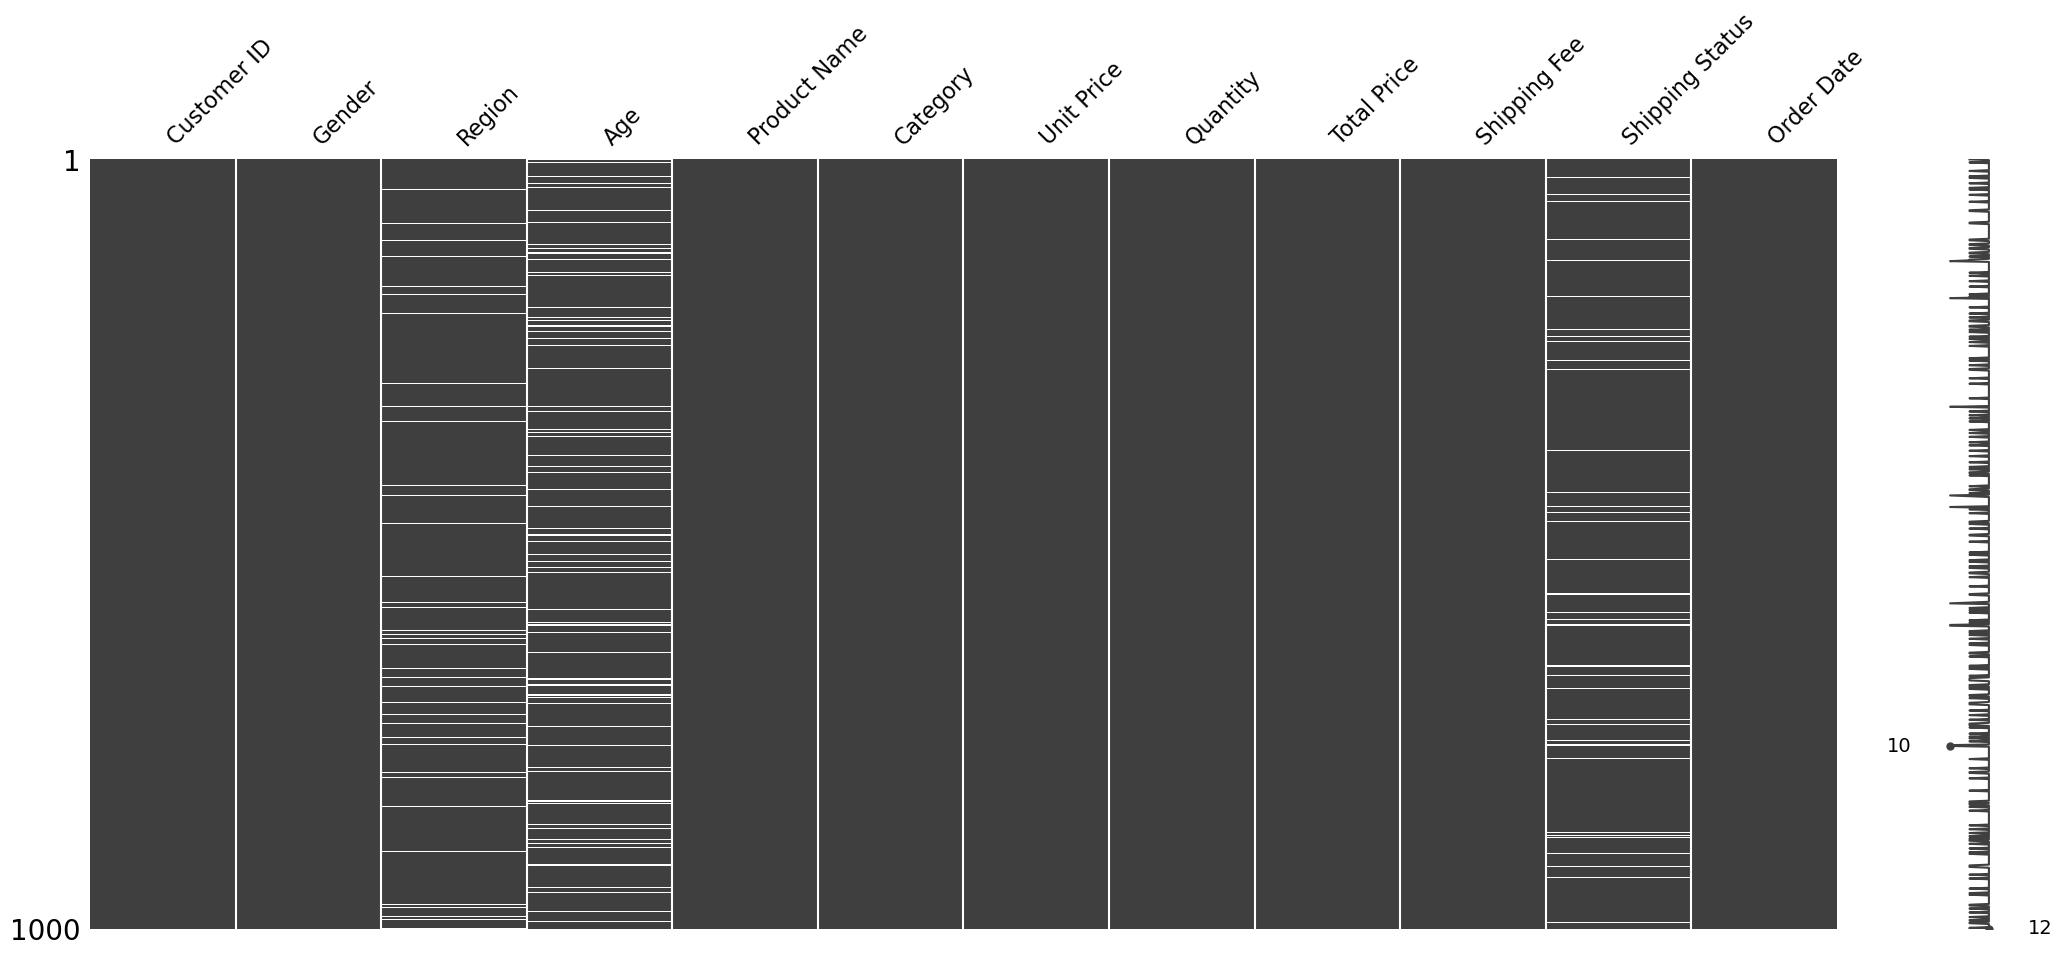

In [15]:
msno.matrix(df);

In [16]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1000   │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA    ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25    ┃ p50     ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Age              │   100 │     10 │    46.7 │   15.01 │  18 │     35 │      49 │     59 │     69 │ ▅▅▆▅▇▇  │  │
│ │ Unit Price       │     0 │      0 │   457.7 │   537.2 │  30 │     50 │     200 │    800 │   3110 │   ▇▂▂   │  │
│ │ Quantity         │     0 │      0 │   3.008 │   1.404 │   1 │      2 │       3 │      4 │      5 │ ▇▇ ▇▇▇  │  │
│ │ Total Price      │     0 │      0 │    1347 │    1834 │  30 │    200 │     600 │   1500 │   7500 │  ▇▁▁▁   │  │
│ │ Shipping Fee     │     0 │      0 │   12.42 │   4.412 │   5 │   8.56 │   12.32 │  16.07 │  19.98 │ ▇▇▇▇▆▇  │  │
│ └──────────────────┴───────┴────────┴─────────┴─────────┴─────┴────────┴─────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA     ┃ NA %       ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Customer ID                     │      0 │          0 │                          1 │                  1000 │  │
│ │ Gender                          │      0 │          0 │                          1 │                  1000 │  │
│ │ Region                          │     50 │          5 │                       0.95 │                   950 │  │
│ │ Product Name                    │      0 │          0 │                          1 │                  1000 │  │
│ │ Category                        │      0 │          0 │                          1 │                  1000 │  │
│ │ Shipping Status                 │     50 │          5 │                        1.3 │                  1279 │  │
│ │ Order Date                      │      0 │          0 │                          1 │                  1000 │  │
│ └─────────────────────────────────┴────────┴────────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [17]:
df.duplicated().sum()

0

<a id='organizing-columns'></a>
# <font color='firebrick'> <b>Organizing Columns</b><font color='black'> 

In [19]:
df.columns

Index(['Customer ID', 'Gender', 'Region', 'Age', 'Product Name', 'Category',
       'Unit Price', 'Quantity', 'Total Price', 'Shipping Fee',
       'Shipping Status', 'Order Date'],
      dtype='object')

In [20]:
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.columns

Index(['customer_id', 'gender', 'region', 'age', 'product_name', 'category',
       'unit_price', 'quantity', 'total_price', 'shipping_fee',
       'shipping_status', 'order_date'],
      dtype='object')

## <font color='indianred'> <b>"customer_id" Column</b><font color='black'> 

In [22]:
df.customer_id.nunique()

292

## <font color='indianred'> <b>"gender" Column</b><font color='black'> 

In [24]:
df.gender.nunique()

2

In [25]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

## <font color='indianred'> <b>"region" Column</b><font color='black'> 

In [27]:
df.region.nunique()

4

In [28]:
df.region.unique()

array(['North', 'West', 'South', 'East', nan], dtype=object)

## <font color='indianred'> <b>"age" Column</b><font color='black'> 

In [30]:
df.age.nunique()

52

In [31]:
df.age.unique()

array([nan, 22., 54., 23., 64., 27., 18., 29., 49., 67., 41., 60., 66.,
       36., 57., 30., 32., 59., 37., 52., 58., 25., 31., 28., 53., 35.,
       43., 61., 19., 38., 44., 68., 42., 51., 46., 62., 33., 24., 21.,
       50., 48., 63., 47., 45., 40., 55., 69., 26., 20., 65., 39., 56.,
       34.])

## <font color='indianred'> <b>"product_name" Column</b><font color='black'> 

In [33]:
df.product_name.nunique()

7

In [34]:
df.product_name.unique()

array(['Monitor', 'Headphones', 'Laptop', 'Smartwatch', 'Keyboard',
       'Mouse', 'Smartphone'], dtype=object)

## <font color='indianred'> <b>"category" Column</b><font color='black'> 

In [36]:
df.category.nunique()

3

In [37]:
df.category.unique()

array(['Electronics', 'Accessories', 'Wearables'], dtype=object)

## <font color='indianred'> <b>"unit_price" Column</b><font color='black'> 

In [39]:
df.unit_price.nunique()

13

In [40]:
df.unit_price.unique()

array([ 300.        ,  100.        , 1500.        ,  200.        ,
         50.        ,   30.        ,  800.        , 1658.43232666,
         62.19121225,  103.65202042,  621.9121225 ,  207.30404083,
       3109.56061249])

In [41]:
df.unit_price = round(df.unit_price, 2)

In [42]:
df.unit_price.unique()

array([ 300.  ,  100.  , 1500.  ,  200.  ,   50.  ,   30.  ,  800.  ,
       1658.43,   62.19,  103.65,  621.91,  207.3 , 3109.56])

## <font color='indianred'> <b>"quantity" Column</b><font color='black'> 

In [44]:
df.quantity.nunique()

5

In [45]:
df.quantity.unique()

array([5, 2, 1, 3, 4], dtype=int64)

## <font color='indianred'> <b>"total_price" Column</b><font color='black'> 

In [47]:
df.total_price.nunique()

26

In [48]:
df.total_price.unique()

array([1500,  200,  300,  500, 4500,  400,  100,   30,   90,  250,  600,
       6000, 1600, 1000, 1200, 4000, 3200,   50,  800,  150,  900, 3000,
       7500,   60,  120, 2400], dtype=int64)

## <font color='indianred'> <b>"shipping_fee" Column</b><font color='black'> 

In [50]:
df.shipping_fee.nunique()

730

## <font color='indianred'> <b>"shipping_status" Column</b><font color='black'> 

In [52]:
df.shipping_status.nunique()

3

In [53]:
df.shipping_status.unique()

array(['Returned', 'In Transit', 'Delivered', nan], dtype=object)

## <font color='indianred'> <b>"order_date" Column</b><font color='black'> 

In [55]:
df.order_date.nunique()

340

In [56]:
df.order_date.dtype

dtype('O')

In [57]:
# changing dtype of order_date column to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

<a id='nan-values'></a>
# <font color='firebrick'> <b>NaN Values</b><font color='black'> 

In [59]:
df.isnull().sum()

customer_id          0
gender               0
region              50
age                100
product_name         0
category             0
unit_price           0
quantity             0
total_price          0
shipping_fee         0
shipping_status     50
order_date           0
dtype: int64

## <font color='indianred'> <b>NaN Values in "region" Column</b><font color='black'> 

In [61]:
df.groupby('product_name')['region'].apply(lambda x: x.mode()[0])

product_name
Headphones     East
Keyboard       West
Laptop         West
Monitor       South
Mouse          West
Smartphone    South
Smartwatch     East
Name: region, dtype: object

In [62]:
df['region'] = df['region'].fillna(df['product_name'].map( df.groupby('product_name')['region'].apply(lambda x: x.mode()[0])))

In [63]:
df.region.isnull().sum()

0

## <font color='indianred'> <b>NaN Values in "shipping_status" Column</b><font color='black'> 

In [65]:
shipping_status_mode = df.groupby("customer_id")['shipping_status'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

In [66]:
df['shipping_status'] = df['shipping_status'].fillna(df['customer_id'].map(shipping_status_mode))

In [67]:
df.shipping_status.isnull().sum()

3

In [68]:
df['shipping_status'] = df['shipping_status'].fillna(df['shipping_status'].mode()[0])

In [69]:
df.shipping_status.isnull().sum()

0

## <font color='indianred'> <b>NaN Values in "age" Column</b><font color='black'> 

In [71]:
age_mode = df.groupby('customer_id')['age'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

In [72]:
df['age'] = df['age'].fillna(df['customer_id'].map(age_mode))

In [73]:
df.age.isnull().sum()

7

In [74]:
df['age'] = df['age'].fillna(df.age.median())

In [75]:
df.age.isnull().sum()

0

In [76]:
df.isnull().sum()

customer_id        0
gender             0
region             0
age                0
product_name       0
category           0
unit_price         0
quantity           0
total_price        0
shipping_fee       0
shipping_status    0
order_date         0
dtype: int64

In [77]:
# saving the last version of df as csv file
# df.to_csv("edited_data.csv", index= False)

<a id='data-visualization'></a>
# <font color='firebrick'> <b>Data Visualization</b><font color='black'> 

## <font color='indianred'> <b>Distribution of Customers by Gender</b><font color='black'> 

In [80]:
type_counts = df['gender'].value_counts()
type_counts

gender
Male      524
Female    476
Name: count, dtype: int64

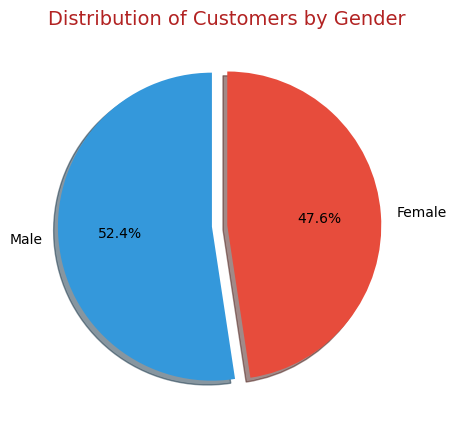

In [81]:
plt.figure(figsize=(8, 5))

plt.pie(x= type_counts.values,
        labels= type_counts.index,
        colors= ['#3498db', '#e74c3c'],
        autopct= '%1.1f%%',
        explode= [0.1, 0],
        shadow= True,
        startangle= 90
       ) 

plt.title('Distribution of Customers by Gender', fontdict= {"color": "firebrick", "fontsize": 14})
plt.show()

The pie chart shows the gender distribution of sales, where **male customers** account for **52.4% of the sales**, and **female customers** make up **47.6%**. This distribution indicates that sales are almost evenly split between genders, with a slight edge for male customers. The balanced nature of the distribution suggests that both men and women are interested in the product, highlighting the importance of targeting both genders in marketing strategies.

## <font color='indianred'> <b>Customer Distribution by Region and Gender</b><font color='black'> 

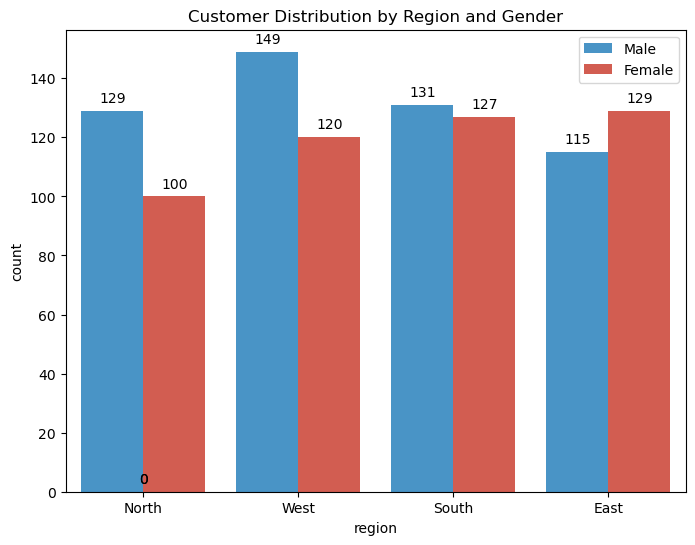

In [84]:
plt.figure(figsize=(8, 6))
bar_plot1 = sns.countplot(x='region', hue='gender', data=df, palette=['#3498db', '#e74c3c'])
plt.title('Customer Distribution by Region and Gender')
plt.legend(bbox_to_anchor= (1,1))

for p in bar_plot1.patches:
    bar_plot1.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9),
                      textcoords = 'offset points',
                      color = 'black') 

plt.show()

This graph reveals some gender imbalances in customer distribution across regions. **The dominance of male customers in the North and West** suggests that the products or services offered in these regions might appeal more to a male demographic. For instance, these regions could have a higher concentration of sales in technology or sports-related products.

**In the South**, the **near-equal gender distribution** indicates a more balanced and diverse customer base, implying that the region caters to both male and female customers equally. On the other hand, **the higher number of female customers in the East** suggests that the products or services in this area may be more tailored towards women, or women may have greater purchasing power in this region.

One key factor to consider in this analysis is the demographic makeup of each region. Regional marketing strategies could be optimized based on these insights. For example, targeting more female-specific campaigns in the East could prove more effective, whereas focusing on male-oriented marketing strategies in the North and West might yield better results.

## <font color='indianred'> <b>Age Distribution of Customers</b><font color='black'> 

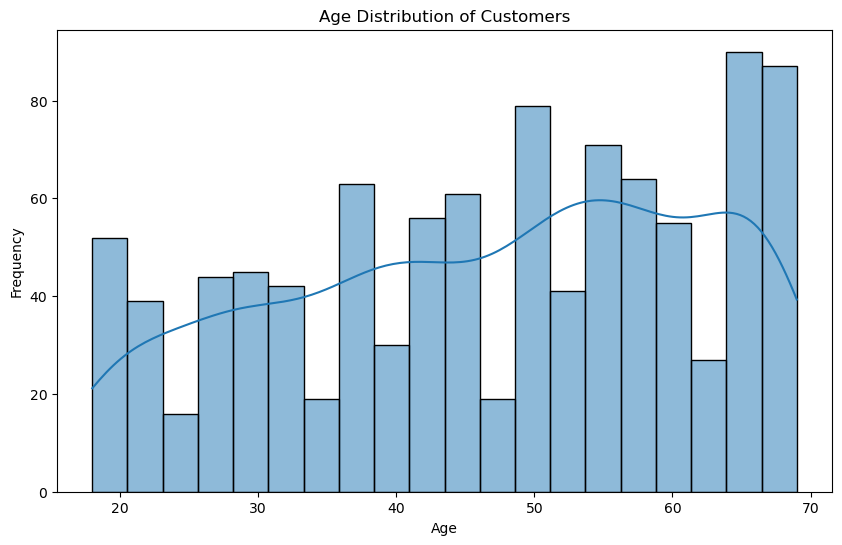

In [87]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

This histogram illustrates the age distribution of customers. Key observations include:

 - There is a slight dip in the number of customers in their 20s and 30s, while there's a rise in the 40s and 50s age groups.
 - There is a noticeable concentration of customers aged 60 and 70, which suggests that older customers might show greater interest in the products.
 - Understanding these distributions can help businesses target the right audience, focusing on older customers who seem to have a higher engagement with the products.

## <font color='indianred'> <b>Top 10 Products by Sales</b><font color='black'> 

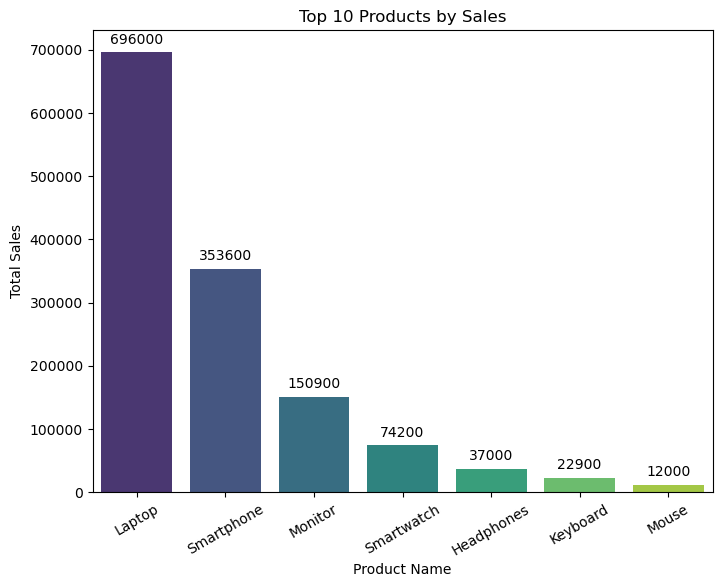

In [90]:
product_sales = df.groupby('product_name')['total_price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
bar_plot2 = sns.barplot(x=product_sales.index, y=product_sales.values, palette= "viridis")

plt.xticks(rotation=30)
plt.title('Top 10 Products by Sales')
plt.ylabel('Total Sales')
plt.xlabel('Product Name')

for p in bar_plot2.patches:
    bar_plot2.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9),
                      textcoords = 'offset points',
                      color = 'black') 

plt.show()

This graph suggests that customers are primarily purchasing high-ticket items like laptops and smartphones, with smaller tech accessories like keyboards and mice being far less popular.

## <font color='indianred'> <b>Distribution of Unit Prices by Category</b><font color='black'> 

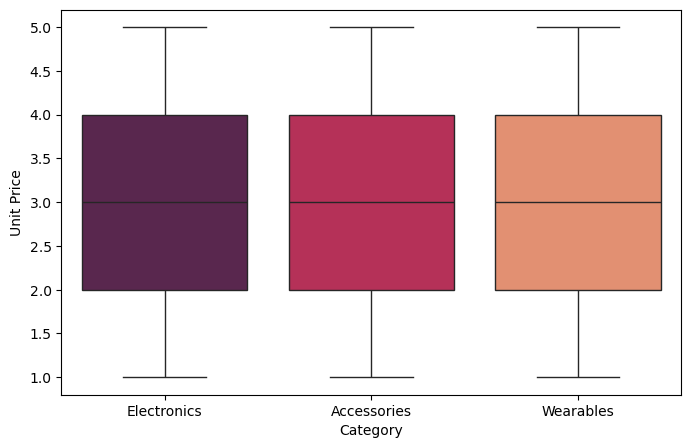

In [93]:
plt.figure(figsize=(8, 5))

sns.boxplot(x='category', y='quantity', data=df, palette=("rocket"))

plt.xlabel('Category')
plt.ylabel('Unit Price')

plt.show()

This boxplot shows the distribution of unit prices across different product categories. There are some distinctions between the categories:

 - **Electronics** and **Accessories** have similar price ranges, with median prices around 3 to 3.5.
 - **Wearables** has a slightly narrower range, but the median price appears to be higher compared to the other two categories.
 - There do not seem to be any outliers in any category, indicating that the unit prices are relatively close and consistent within each category.

## <font color='indianred'> <b>Counts of Products by Quantity</b><font color='black'> 

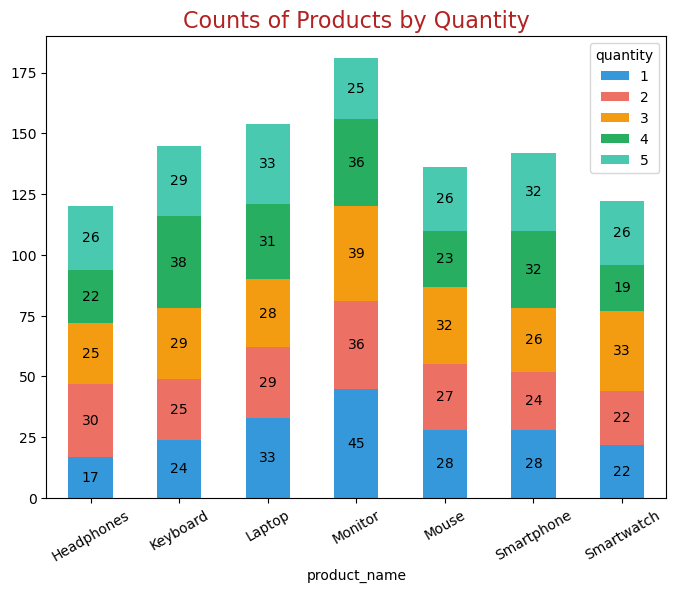

In [163]:
content_category_cross = pd.crosstab( df['product_name'], df['quantity'])

ax = content_category_cross.plot(kind='bar',
                            stacked=True,
                            figsize=(8,6),
                            color= ["#3498db", "#ec7063", "#f39c12", "#27ae60", "#48c9b0"]
                           )

plt.title("Counts of Products by Quantity", fontdict={'fontsize': 16, 'color': 'firebrick'})
plt.xticks(rotation= 30)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10, color='black')

plt.show()

The chart shows that Monitors and Laptops tend to be bought in larger quantities, indicating higher demand for bulk purchases, likely from businesses or institutions. In contrast, Headphones, Smartwatches, and other products show a more balanced distribution, reflecting a mix of individual and bulk buyers. Products like Keyboards, Mouse, and Smartphones appear to have moderate sales, serving both individual consumers and larger orders.

This analysis highlights the purchasing behavior variations based on product type, suggesting potential for targeted marketing strategies, especially for bulk purchases in categories like monitors and laptops.

## <font color='indianred'> <b>Total Sales by Region</b><font color='black'> 

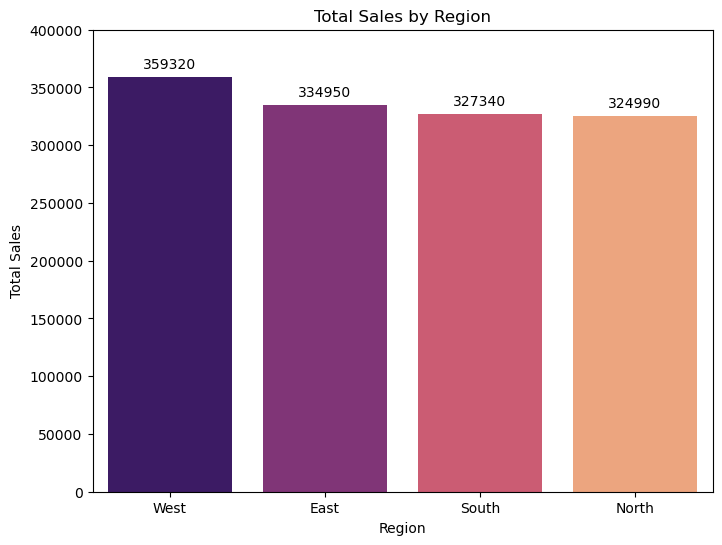

In [172]:
region_sales = df.groupby('region')['total_price'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))

bar_plot3 = sns.barplot(x=region_sales.index, y=region_sales.values, palette= "magma")

for p in bar_plot3.patches:
    bar_plot3.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9),
                      textcoords = 'offset points',
                      color = 'black') 

plt.yticks(np.arange(0, 400001, 50000))

plt.title('Total Sales by Region')
plt.ylabel('Total Sales')
plt.xlabel('Region')

plt.show()

The "Total Sales by Region" bar plot reveals that sales are relatively evenly distributed across regions, with the **West leading at 359320** and the **North having the lowest sales at 324990**. While the West region shows a slight advantage in total sales, the small gap between regions suggests a balanced market performance. This consistency may indicate that the company's products and services are well-received across all regions, but there might still be room for improvement in the North to align its sales with the other regions.

## <font color='indianred'> <b>Distribution of Shipping Status</b><font color='black'> 

In [236]:
status = df.shipping_status.value_counts()
status

shipping_status
In Transit    343
Delivered     338
Returned      319
Name: count, dtype: int64

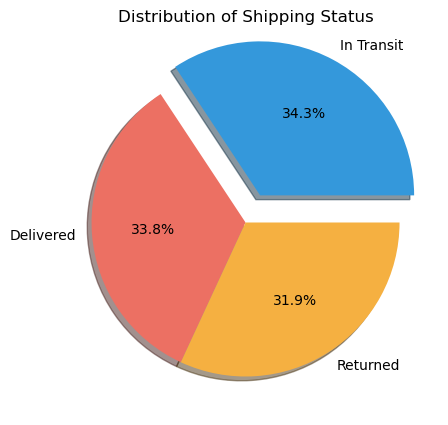

In [320]:
plt.figure(figsize=(8, 5))
plt.pie(x= status.values,
        labels = status.index,
        autopct='%1.1f%%',
        shadow= True,
        colors= ['#3498db', '#ec7063', '#f5b041'],
        explode= [0.2, 0, 0]
       )
plt.title('Distribution of Shipping Status')
plt.show()

The chart shows a balanced division across all categories, with "in transit" at 34.3%, "delivered" at 33.8%, and "returned" at 31.9%. The nearly equal proportions suggest potential inefficiencies in the shipping process, particularly the high return rate, which could indicate issues related to product quality or customer satisfaction.**Optimizing the delivery and return processes might help reduce the percentage of returned items and improve customer experience.**

## <font color='indianred'> <b>Customer Age vs Total Sales</b><font color='black'> 

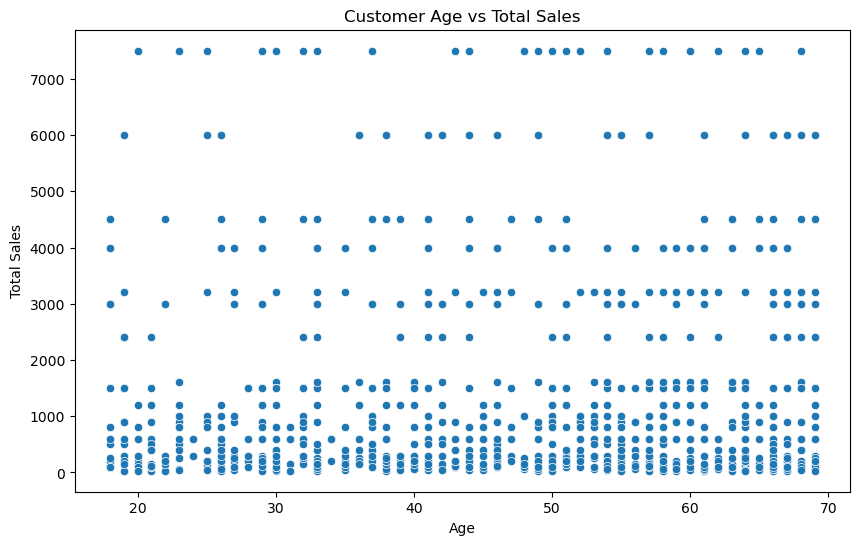

In [348]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='total_price', data=df)
plt.title('Customer Age vs Total Sales')
plt.xlabel('Age')
plt.ylabel('Total Sales')
plt.show()

This scatter plot illustrates the relationship between customer age and total sales. Here are some observations:

 - The age range extends up to 70, with varying levels of total sales across all age groups.
 - A significant concentration of total sales appears between 0 and 2000, particularly for younger customers.
 - Sales values above 3000 are less frequent, though they occur in the age range of 20 to 60.
 - There is no clear trend that suggests sales decrease or increase with age, indicating that age might not directly correlate with total sales.

## <font color='indianred'> <b>Shipping Fee vs Total Sales</b><font color='black'> 

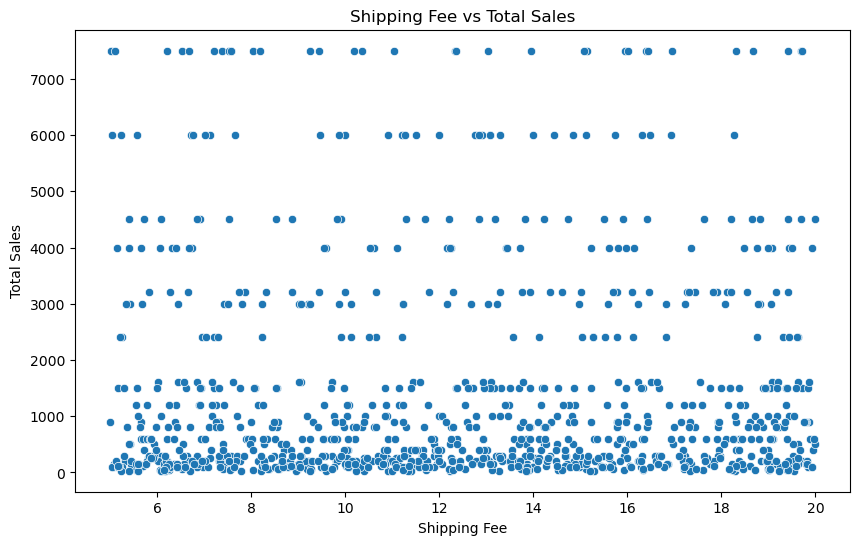

In [352]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='shipping_fee', y='total_price', data=df)
plt.title('Shipping Fee vs Total Sales')
plt.xlabel('Shipping Fee')
plt.ylabel('Total Sales')
plt.show()

This scatter plot displays the relationship between shipping fees and total sales. The data is spread across various total sales amounts, with clusters of points at specific price levels, especially between 0 and 1000 total sales. There's no clear linear or consistent pattern indicating a direct correlation between the shipping fee and total sales, suggesting that other factors could be influencing total sales more significantly than the shipping fee alone.

## <font color='indianred'> <b>E-Commerce Data Set Correlation</b><font color='black'> 

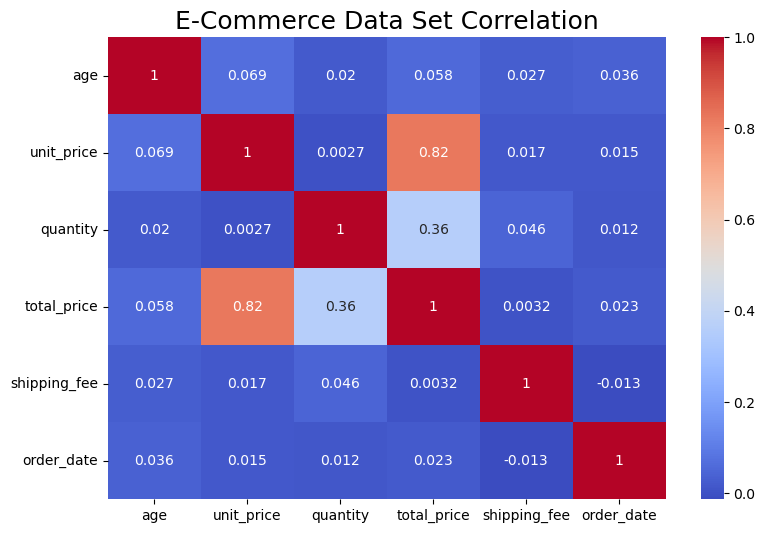

In [362]:
plt.figure(figsize=(9, 6))

numeric_df = df.select_dtypes(exclude="object")

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('E-Commerce Data Set Correlation', fontsize=18)
plt.show()

**Strong Correlation Between Unit Price and Total Price (0.82):**
 - There is a strong positive correlation between the unit price and total price, as expected. This makes sense because as the unit price increases, the total price will naturally increase as well, especially if the quantity remains the same or increases.

**Moderate Correlation Between Quantity and Total Price (0.36):**
 - The quantity of items purchased has a moderate positive correlation with the total price. This indicates that larger orders tend to lead to higher total sales, though the impact is less direct than unit price.

**Weak or Insignificant Correlation Between Other Variables:**
 - Shipping fee shows almost no correlation with other variables, including total price (0.0032). This suggests that shipping costs remain relatively constant or unrelated to the other factors.
 - Age, order date, and shipping fee exhibit minimal correlations with other features, implying that they don’t significantly impact unit price, quantity, or total price in this dataset.

**No Correlation Between Age and Order Details:**
 - The age of the customer has almost no correlation with factors like unit price or total price, which means that age is not a significant predictor of purchasing behavior in this dataset.

Overall, the strongest relationships in this dataset are between unit price and total price and between quantity and total price. Other variables like shipping fee, age, and order date show little to no significant correlation with the key purchasing metrics, indicating that these may not be important factors when analyzing total sales or customer behavior.

**Final Project Summary:**

The analysis highlights several critical findings. The lack of correlation between shipping fees and total sales suggests that efforts to optimize product pricing and bulk offerings could yield higher returns than focusing on shipping cost adjustments. The strong demand for bulk purchases of laptops and monitors suggests potential business partnerships or targeted marketing strategies. Additionally, the strong correlation between unit price and total price confirms the importance of strategic pricing for high-demand items. Lastly, regional sales differences underline the need for region-specific business strategies to maximize sales and customer satisfaction.

**In conclusion, this analysis provides a detailed insight into the sales dynamics of an e-commerce business, highlighting key factors such as shipping fees, product quantities, and correlations between different variables. The results indicate several important trends that could guide business decisions, especially regarding bulk purchases, customer behavior, and pricing strategies.**

<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>THANK YOU!</b></p>